In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [19]:
df = pd.read_csv('waves.csv')
df.head()

,hh,WDIR,WSPD,GST,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,WVHT
0,1,23,3.0,3.6,4.17,3.33,349,1019.1,4.7,5.1,4.2,0.39
1,2,30,2.9,3.3,5.26,4.21,358,1018.8,4.6,4.8,4.1,0.65
2,3,360,2.2,2.5,5.88,4.79,11,1018.3,4.6,4.7,4.2,0.90
3,4,355,2.5,3.1,5.88,4.95,23,1018.1,4.6,4.6,4.2,0.91
4,5,355,3.5,4.5,6.25,4.98,26,1018.3,4.5,4.6,4.0,0.88


In [20]:
alpha = 0.8
size1 = int(len(df)*alpha)
testdf = df[:size1]
traindf = df[size1:]

In [21]:
testdf.head()

,hh,WDIR,WSPD,GST,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,WVHT
0,1,23,3.0,3.6,4.17,3.33,349,1019.1,4.7,5.1,4.2,0.39
1,2,30,2.9,3.3,5.26,4.21,358,1018.8,4.6,4.8,4.1,0.65
2,3,360,2.2,2.5,5.88,4.79,11,1018.3,4.6,4.7,4.2,0.90
3,4,355,2.5,3.1,5.88,4.95,23,1018.1,4.6,4.6,4.2,0.91
4,5,355,3.5,4.5,6.25,4.98,26,1018.3,4.5,4.6,4.0,0.88


TypeError: 'str' object is not callable

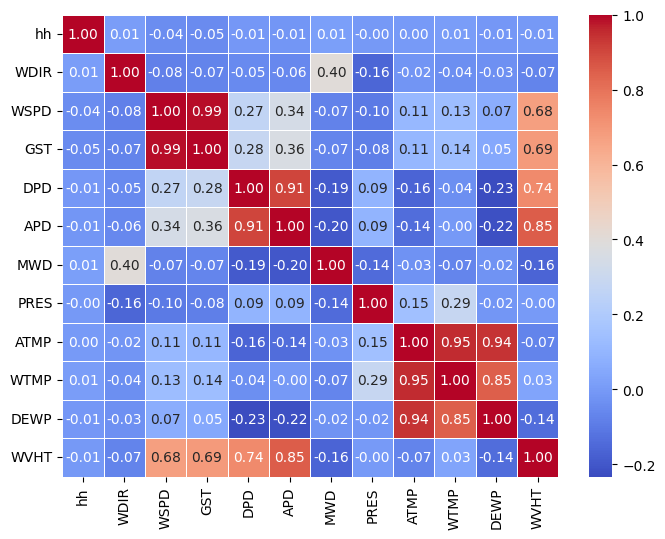

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train = traindf[['WSPD', 'GST', 'DPD', 'ATMP']]
y_train = traindf['WVHT']
X_test = testdf[['WSPD', 'GST', 'DPD', 'ATMP']]
y_test = testdf['WVHT']

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared:.4f}')


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R-squared: 0.7147
Coefficients: [-0.06334907  0.11442912  0.12624061 -0.0022792 ]
Intercept: -0.3285694924673084


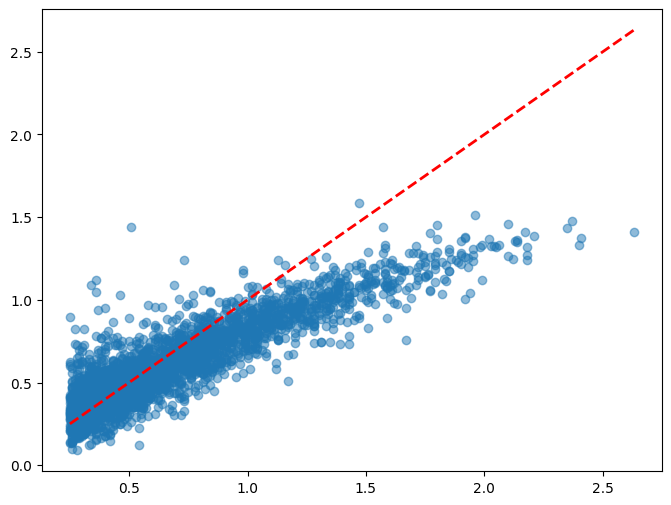

In [25]:
plt.figure(figsize=(8,6))
plt.xlabel = 'actual value'
plt.ylabel = 'predicted value'
plt.title = 'scatter plot'
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)


In [ ]:
X_trainr = traindf[['WSPD', 'GST', 'DPD', 'ATMP']]
y_trainr = traindf['WVHT']
X_testr = testdf[['WSPD', 'GST', 'DPD', 'ATMP']]
y_testr = testdf['WVHT']

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_trainr, y_trainr)
y_predr= ridge_model.predict(X_testr)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_testr, y_predr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_testr, y_predr)
r2 = r2_score(y_testr, y_predr)


print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²) score: {r2}')


In [ ]:
from sklearn.model_selection import GridSearchCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100] 
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_trainr, y_trainr)
best_alpha = grid_search.best_params_['alpha']
print(f'Best Alpha (Lambda): {best_alpha}')


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_trainr, y_trainr)
y_pred_lasso = lasso_model.predict(X_testr)

In [ ]:
lasso_coefficients = lasso_model.coef_
feature_names = X_trainr.columns  

coefficients_dict = {feature_names[i]: lasso_coefficients[i] for i in range(len(feature_names))}

print("Variable Coefficients:")
for feature, coefficient in coefficients_dict.items():
    if coefficient != 0:
        print(f"{feature}: {coefficient}")
    else:
        print(f"{feature}: Dropped (Coefficient is 0)")


In [ ]:
r2_lasso = r2_score(y_testr, y_pred_lasso)

print(f'R-squared (R²) score for the Lasso model: {r2_lasso}')

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=alpha_value)

elastic_net_model.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)

r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print(f'Elastic Net Model with Alpha = {alpha_value}')
print(f'R-squared (R²) score for the Elastic Net model: {r2_elastic_net}')